In [1]:
import pandas as pd
df1 = pd.DataFrame({"key":['a','b','c','b'],'data1':range(4)})
df1

,key,data1
0,a,0
1,b,1
2,c,2
3,b,3


In [12]:
df2 = pd.DataFrame({"key":['b'],'data2':range(1)})
df2

,key,data2
0,b,0


In [3]:
pd.merge(df1,df2) #如果没有指定哪个列进行连接，则会按列名相同的连接

,key,data1,data2
0,b,1,0
1,b,3,0


In [4]:
pd.merge(df1,df2,on='key')

,key,data1,data2
0,b,1,0
1,b,3,0


In [13]:
pd.merge(df1,df2,how='outer')

,key,data1,data2
0,a,0,NaN
1,b,1,0.0
2,b,3,0.0
3,c,2,NaN


In [6]:
pd.merge(df1,df2,how='left')

,key,data1,data2
0,a,0,NaN
1,b,1,0.0
2,c,2,NaN
3,b,3,0.0


In [8]:
pd.merge(df1,df2,how='right')

,key,data1,data2
0,b,1,0
1,b,3,0


In [18]:
import json
db = json.load(open(r"C:\Users\zhang\Desktop\excel\database.json"))
len(db)

6636

In [19]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [20]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [22]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [23]:
len(nutrients)

162

In [24]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [25]:
info_keys =['description','group','id','manufacturer']
info = pd.DataFrame(db,columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [27]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [29]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients,ignore_index=True)

In [30]:
nutrients.duplicated().sum()

14179

In [31]:
nutrients = nutrients.drop_duplicates()

In [33]:
nutrients[:5]

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [34]:
col_mapping ={'description':'food','group':'fgroup'}
info = info.rename(columns=col_mapping,copy=False)
info[:5]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [35]:
col_mapping ={'description':'nutrient','group':'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping,copy=False)
nutrients[:5]

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [63]:
ndata = pd.merge(nutrients,info,on='id',how='outer')
ndata[:5]

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [52]:
ndata.loc[3,'nutrient'] #loc 基于标签名字进行索引，iloc基于行号，列号进行索引

'Ash'

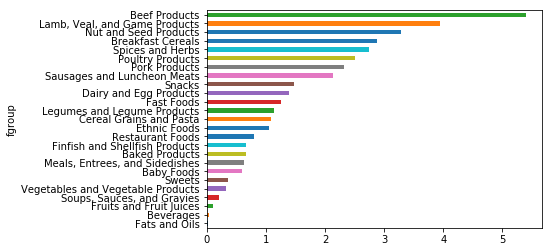

In [143]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
#result['Zinc'].order().plot(kind='barh')
result['Zinc, Zn'].sort_values().plot(kind='barh')


In [125]:
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
by_nutrient.agg(['min','max'])

units          value  \
                                                min      max   min   
nutgroup    nutrient                                                 
Amino Acids Alanine                               g        g  0.00   
            Arginine                              g        g  0.00   
            Aspartic acid                         g        g  0.00   
            Cystine                               g        g  0.00   
            Glutamic acid                         g        g  0.00   
            Glycine                               g        g  0.00   
            Histidine                             g        g  0.00   
            Hydroxyproline                        g        g  0.00   
            Isoleucine                            g        g  0.00   
            Leucine                               g        g  0.00   
            Lysine                                g        g  0.00   
            Methionine                            g        g  0.00   
            Phenylalanine                         g        g  0.00   
            Proline                               g        g  0.00   
            Serine                                g        g  0.00   
            Threonine                             g        g  0.00   
            Tryptophan                            g        g  0.00   
            Tyrosine                              g        g  0.00   
            Valine                                g        g  0.00   
Composition Adjusted Protein                      g        g  2.18   
            Carbohydrate, by difference           g        g  0.00   
            Fiber, total dietary                  g        g  0.00   
            Protein                               g        g  0.00   
            Sugars, total                         g        g  0.00   
            Total lipid (fat)                     g        g  0.00   
            Water                                 g        g  0.00   
Elements    Calcium, Ca                          mg       mg  0.00   
            Copper, Cu                           mg       mg  0.00   
            Fluoride, F                         mcg      mcg  0.00   
            Iron, Fe                             mg       mg  0.00   
...                                             ...      ...   ...   
Vitamins    Cryptoxanthin, beta                 mcg      mcg  0.00   
            Dihydrophylloquinone                mcg      mcg  0.00   
            Folate, DFE                     mcg_DFE  mcg_DFE  0.00   
            Folate, food                        mcg      mcg  0.00   
            Folate, total                       mcg      mcg  0.00   
            Folic acid                          mcg      mcg  0.00   
            Lutein + zeaxanthin                 mcg      mcg  0.00   
            Lycopene                            mcg      mcg  0.00   
            Menaquinone-4                       mcg      mcg  0.00   
            Niacin                               mg       mg  0.00   
            Pantothenic acid                     mg       mg  0.00   
            Retinol                             mcg      mcg  0.00   
            Riboflavin                           mg       mg  0.00   
            Thiamin                              mg       mg  0.00   
            Tocopherol, beta                     mg       mg  0.00   
            Tocopherol, delta                    mg       mg  0.00   
            Tocopherol, gamma                    mg       mg  0.00   
            Vitamin A, IU                        IU       IU  0.00   
            Vitamin A, RAE                  mcg_RAE  mcg_RAE  0.00   
            Vitamin B-12                        mcg      mcg  0.00   
            Vitamin B-12, added                 mcg      mcg  0.00   
            Vitamin B-6                          mg       mg  0.00   
            Vitamin C, total ascorbic acid       mg       mg  0.00   
            Vitamin D                            IU     

In [98]:
get_maxinum = lambda x:x.xs(x.value.idxmax())
get_mininum = lambda x:x.xs(x.value.idxmin())

<function __main__.<lambda>(x)>

In [126]:
max_foods = by_nutrient.apply(get_maxinum)[['value','food']]

In [127]:
max_foods.food = max_foods.food.str[:60]

In [128]:
max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          